In [1]:
%matplotlib inline


# 1D Screened optimal transport


This example illustrates the computation of Screenkhorn:
Screening Sinkhorn Algorithm for Optimal transport.



In [2]:
# Author: Mokhtar Z. Alaya <mokhtarzahdi.alaya@gmail.com>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot.plot
from ot.datasets import make_1D_gauss as gauss
from ot.bregman import screenkhorn

Generate data
-------------



In [3]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Plot distributions and loss matrix
----------------------------------



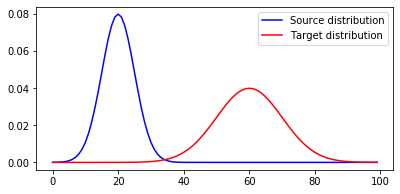

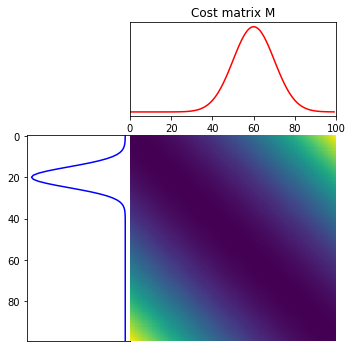

In [4]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

# plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve Screenkhorn
-----------------------



epsilon = 0.020986042861303855

kappa = 3.7476531411890917

Cardinality of selected points: |Isel| = 30 	 |Jsel| = 30 



/home/rflamary/PYTHON/POT/ot/bregman.py:2056: UserWarning: Bottleneck module is not installed. Install it from https://pypi.org/project/Bottleneck/ for better performance.
  "Bottleneck module is not installed. Install it from https://pypi.org/project/Bottleneck/ for better performance.")


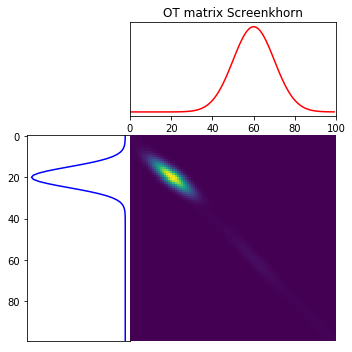

In [5]:
# Screenkhorn
lambd = 2e-03  # entropy parameter
ns_budget = 30  # budget number of points to be keeped in the source distribution
nt_budget = 30  # budget number of points to be keeped in the target distribution

G_screen = screenkhorn(a, b, M, lambd, ns_budget, nt_budget, uniform=False, restricted=True, verbose=True)
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G_screen, 'OT matrix Screenkhorn')
pl.show()